In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Indices

indices in pandas don't have to be unique

In [2]:
cars = pd.read_csv('./datasets/cars.csv')
cars

,Unnamed: 0,country,drives_right,cars_per_cap
0,US,United States,True,809
1,AUS,Australia,False,731
2,JPN,Japan,False,588
3,IN,India,False,18
4,RU,Russia,True,200
5,MOR,Morocco,True,70
6,EG,Egypt,True,45


In [3]:
cars = cars.drop('Unnamed: 0', axis=1)
cars

,country,drives_right,cars_per_cap
0,United States,True,809
1,Australia,False,731
2,Japan,False,588
3,India,False,18
4,Russia,True,200
5,Morocco,True,70
6,Egypt,True,45


In [4]:
cars.set_index('country')

,drives_right,cars_per_cap
country,,
United States,True,809
Australia,False,731
Japan,False,588
India,False,18
Russia,True,200
Morocco,True,70
Egypt,True,45


In [5]:
cars.reset_index(drop=True)

,country,drives_right,cars_per_cap
0,United States,True,809
1,Australia,False,731
2,Japan,False,588
3,India,False,18
4,Russia,True,200
5,Morocco,True,70
6,Egypt,True,45


Why we would bother with index? The answer is - it makes subsetting easier

In [6]:
cars[cars['country'].isin(['India', 'Japan'])]

,country,drives_right,cars_per_cap
2,Japan,False,588
3,India,False,18


In [7]:
cars_indexed = cars.set_index('country')
cars_indexed.loc[['India', 'Japan']]

,drives_right,cars_per_cap
country,,
India,False,18
Japan,False,588


In [8]:
cars_double_indexed = cars.set_index(['country', 'drives_right'])
cars_double_indexed

,,cars_per_cap
country,drives_right,
United States,True,809
Australia,False,731
Japan,False,588
India,False,18
Russia,True,200
Morocco,True,70
Egypt,True,45


In [9]:
cars_double_indexed.loc[[('Australia', False), ('Egypt', True)]]

,,cars_per_cap
country,drives_right,
Australia,False,731
Egypt,True,45


In [10]:
cars_double_indexed.loc[['Australia', 'Egypt']]

,,cars_per_cap
country,drives_right,
Australia,False,731
Egypt,True,45


In [11]:
cars_double_indexed.sort_index(level=['country', 'drives_right'], ascending=[True, False])

,,cars_per_cap
country,drives_right,
Australia,False,731
Egypt,True,45
India,False,18
Japan,False,588
Morocco,True,70
Russia,True,200
United States,True,809


## Slicing

If you want to slice indices, you'd better sort them

In [12]:
cars_indexed = cars.set_index('country').sort_index()
cars_indexed

,drives_right,cars_per_cap
country,,
Australia,False,731
Egypt,True,45
India,False,18
Japan,False,588
Morocco,True,70
Russia,True,200
United States,True,809


In [13]:
cars_indexed.loc['Australia':'Morocco']

,drives_right,cars_per_cap
country,,
Australia,False,731
Egypt,True,45
India,False,18
Japan,False,588
Morocco,True,70


This technique works on the inner index

In [14]:
cars_double_indexed = cars.set_index(['country', 'drives_right']).sort_index(level=['country', 'drives_right'])
cars_double_indexed

,,cars_per_cap
country,drives_right,
Australia,False,731
Egypt,True,45
India,False,18
Japan,False,588
Morocco,True,70
Russia,True,200
United States,True,809


Here is a general pattern.
`DataFrame.loc[<row-slice>, <column-slice>]`
The same thing is with `iloc`, but instead of labels you use numeric indices

In [15]:
cars_double_indexed.loc[('Australia', False):('Japan', False), 'cars_per_cap':]

,,cars_per_cap
country,drives_right,
Australia,False,731
Egypt,True,45
India,False,18
Japan,False,588


### Slicing through date

In [16]:
avocados = pd.read_pickle('./datasets/avoplotto.pkl').astype({ 'date': 'datetime64' })
avocados

,date,type,year,avg_price,size,nb_sold
0,2015-12-27,conventional,2015,0.95,small,9626901.09
1,2015-12-20,conventional,2015,0.98,small,8710021.76
2,2015-12-13,conventional,2015,0.93,small,9855053.66
3,2015-12-06,conventional,2015,0.89,small,9405464.36
4,2015-11-29,conventional,2015,0.99,small,8094803.56
...,...,...,...,...,...,...
1009,2018-02-04,organic,2018,1.53,extra_large,1703.52
1010,2018-01-28,organic,2018,1.61,extra_large,1270.61
1011,2018-01-21,organic,2018,1.63,extra_large,1490.02
1012,2018-01-14,organic,2018,1.59,extra_large,1580.01


In [17]:
avocados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       1014 non-null   datetime64[ns]
 1   type       1014 non-null   object        
 2   year       1014 non-null   int64         
 3   avg_price  1014 non-null   float64       
 4   size       1014 non-null   object        
 5   nb_sold    1014 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(2)
memory usage: 47.7+ KB


In [18]:
avocados_indexed = avocados.set_index('date').sort_index()
avocados_indexed.loc['2015-12-27':'2018-02-04']

,type,year,avg_price,size,nb_sold
date,,,,,
2015-12-27,conventional,2015,0.95,large,10197890.05
2015-12-27,organic,2015,1.52,extra_large,5836.04
2015-12-27,conventional,2015,0.95,small,9626901.09
2015-12-27,conventional,2015,0.95,extra_large,1184340.09
2015-12-27,organic,2015,1.52,small,89709.92
...,...,...,...,...,...
2018-02-04,organic,2018,1.53,small,117922.52
2018-02-04,organic,2018,1.53,large,287724.61
2018-02-04,conventional,2018,0.87,extra_large,1066830.22


In [19]:
avocados_indexed.loc['2015':'2018']

,type,year,avg_price,size,nb_sold
date,,,,,
2015-01-04,conventional,2015,0.95,extra_large,844093.32
2015-01-04,conventional,2015,0.95,small,12357161.34
2015-01-04,organic,2015,1.46,extra_large,4370.99
2015-01-04,organic,2015,1.46,small,233286.13
2015-01-04,conventional,2015,0.95,large,13624083.05
...,...,...,...,...,...
2018-03-25,conventional,2018,1.03,small,14130799.10
2018-03-25,conventional,2018,1.03,extra_large,758801.12
2018-03-25,organic,2018,1.55,large,342853.10


In [20]:
avocados_indexed.loc['Aug 2015':'Feb 2018']

,type,year,avg_price,size,nb_sold
date,,,,,
2015-08-02,conventional,2015,1.09,large,12219014.12
2015-08-02,organic,2015,1.00,small,164126.00
2015-08-02,organic,2015,1.00,large,263359.00
2015-08-02,conventional,2015,1.09,extra_large,984702.75
2015-08-02,organic,2015,1.00,extra_large,5115.00
...,...,...,...,...,...
2018-02-25,conventional,2018,1.06,extra_large,724330.16
2018-02-25,organic,2018,1.57,small,122912.97
2018-02-25,organic,2018,1.57,large,340374.83


### Pivot table

In [21]:
avocados.pivot_table(values=['avg_price', 'nb_sold'], index=['type'], columns=['size'], aggfunc=[np.mean])

mean                                                   \
               avg_price                            nb_sold                 
size         extra_large     large     small    extra_large         large   
type                                                                        
conventional    1.092012  1.092012  1.092012  918703.964142  1.161486e+07   
organic         1.546036  1.546036  1.546036    5409.545503  3.082844e+05   

                            
                            
size                 small  
type                        
conventional  1.201098e+07  
organic       1.484047e+05

## Visualizaing

In [22]:
homeless_data = pd.read_pickle('./datasets/homeless_data.pkl')
homeless_data.head()

,region,state,individuals,family_members,state_pop
0,East South Central,Alabama,2570.0,864.0,4887681
1,Pacific,Alaska,1434.0,582.0,735139
2,Mountain,Arizona,7259.0,2606.0,7158024
3,West South Central,Arkansas,2280.0,432.0,3009733
4,Pacific,California,109008.0,20964.0,39461588


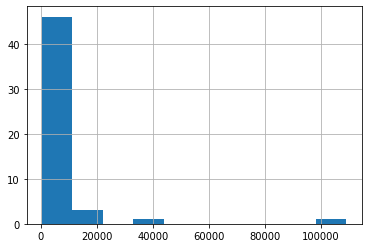

In [23]:
homeless_data['individuals'].hist()
plt.show()

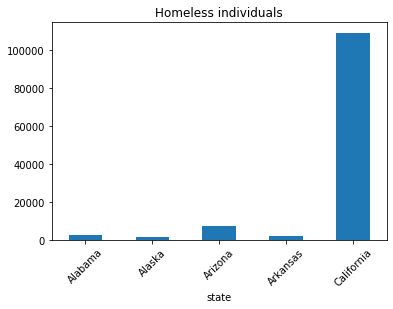

In [24]:
homeless_data[homeless_data['state'].isin(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California'])] \
    .groupby('state')['individuals'] \
    .mean() \
    .plot(kind='bar', title='Homeless individuals', rot=45)
# rot - degrees to rotate x, so it is easier to read
plt.show()

In [25]:
avocados = pd.read_pickle('./datasets/avoplotto.pkl').astype({ 'date': 'datetime64' })
avocados

,date,type,year,avg_price,size,nb_sold
0,2015-12-27,conventional,2015,0.95,small,9626901.09
1,2015-12-20,conventional,2015,0.98,small,8710021.76
2,2015-12-13,conventional,2015,0.93,small,9855053.66
3,2015-12-06,conventional,2015,0.89,small,9405464.36
4,2015-11-29,conventional,2015,0.99,small,8094803.56
...,...,...,...,...,...,...
1009,2018-02-04,organic,2018,1.53,extra_large,1703.52
1010,2018-01-28,organic,2018,1.61,extra_large,1270.61
1011,2018-01-21,organic,2018,1.63,extra_large,1490.02
1012,2018-01-14,organic,2018,1.59,extra_large,1580.01


You can plot 2 or more histograms on the top of each other

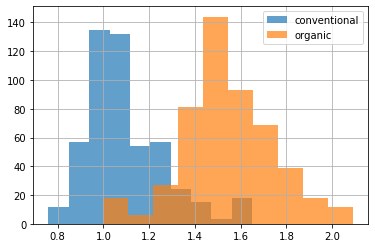

In [26]:
# alpha - opacity
avocados[avocados['type'] == 'conventional']['avg_price'].hist(alpha=0.7)
avocados[avocados['type'] == 'organic']['avg_price'].hist(alpha=0.7)
plt.legend(avocados['type'].drop_duplicates().sort_values())
plt.show()

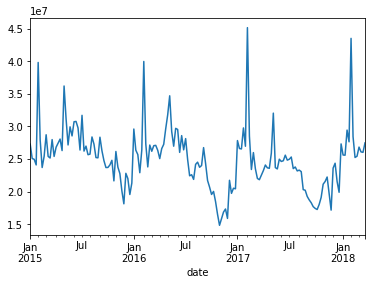

In [27]:
# Let's plot by ng_sold by date
avocados.groupby('date')['nb_sold'] \
    .sum() \
    .plot(kind='line')
plt.show()

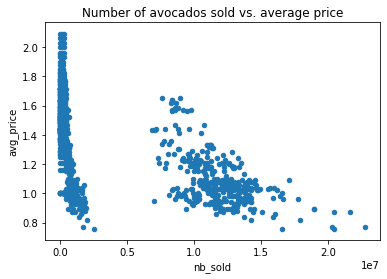

In [28]:
avocados.plot(kind='scatter', x='nb_sold', y='avg_price', title='Number of avocados sold vs. average price')
plt.show()

### Missing values

You can check for missing values

In [29]:
avocados.isna()

,date,type,year,avg_price,size,nb_sold
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
1009,False,False,False,False,False,False
1010,False,False,False,False,False,False
1011,False,False,False,False,False,False
1012,False,False,False,False,False,False


Shows if there is any missing value in each column

In [30]:
avocados.isna().any()

date         False
type         False
year         False
avg_price    False
size         False
nb_sold      False
dtype: bool

Count how many missing values in each column

In [31]:
avocados.isna().sum()

date         0
type         0
year         0
avg_price    0
size         0
nb_sold      0
dtype: int64